<a href="https://colab.research.google.com/github/sumu97/Data-Science-Cheat-Code/blob/main/ai_sc41x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC41x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

- **Neuron:** 신경망에서 신경 하나, 다수의 데이터를 받아 어떠한 연산을 해 하나의결과를 다음 신경망으로 넘겨준다.
- **Input Layer:** 입력을 받아주는 층, 데이터의 Feature만큼 노드가 생성된다.신경망 구조의 맨 앞
- **Hidden Layer:** 앞쪽에서 데이터를 받아와 내부에서 가중치와 편향에 따른 연산을 하고 다음 층으로 넘겨준다
- **Output Layer:** 앞에서의 연산 결과를 출력해주는 층
- **Activation Function:** 데이터가 인풋 - 히든 - 아웃풋 레이어로 계산되어 오는 정방향의 이동과정
- **Back Propagation:** 최종값으로 구한 오차를 바탕으로 꺼꾸로 돌아가면서 각 뉴런들의 가중치와 편향을 조정해주는 이동과정

### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

역전파는 문제를 푼 사람한테 뭐가 틀렸는지 알려주는 과정이에요.  
예를 들어, 4번이라고 찍었는데 역전파가 "응 4번 아니야~ 돌아가~" 하면 처음으로 돌아가서 조금이라도 더 잘 풀수 있겠죠?  
 정말 운이 나빠서 계속 틀린다고 해도 네번 틀리고 나면 정답을 알려주게 되는데, 이런 방식으로 정답을 잘 맞추게 됩니다.

### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.

퍼셉트론은 크게 두 부분으로 나누어져 있습니다.  
데이터를 입력받은 뒤 첫번째는 가중치 편향 연산인데, 퍼셉트론에 입력된 데이터에 각각 가중치를 곱하고 전부 더해주게 됩니다.  
두번째는 활성화 함수인데, 앞서 구해진 값을 얼마나 출력할지를 구해줍니다. 구해진 값에 따라 앞의 값을 출력하게 됩니다.

<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

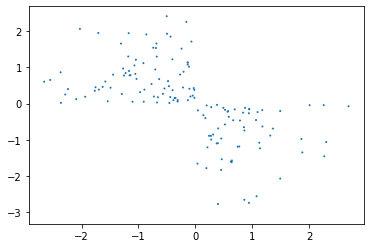

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [ ]:
import tensorflow as tf

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

h1 = model1.fit(X, y, epochs=30)

Epoch 1/30
10/10 [==============================] - 2s 4ms/step - loss: 0.7357 - accuracy: 0.5167
Epoch 2/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7344 - accuracy: 0.5167
Epoch 3/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7331 - accuracy: 0.5233
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7318 - accuracy: 0.5233
Epoch 5/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7305 - accuracy: 0.5233
Epoch 6/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7293 - accuracy: 0.5233
Epoch 7/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7280 - accuracy: 0.5267
Epoch 8/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7267 - accuracy: 0.5267
Epoch 9/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7255 - accuracy: 0.5300
Epoch 10/30
10/10 [==============================] - 0s 4ms/step - loss: 0.7244 - accuracy: 0.5300
Epoch 11/30
10/10 [


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model2 = Sequential()
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

early_stopping = myCallback()

h2 = model2.fit(X, y, epochs=30, callbacks = [early_stopping])

Epoch 1/30
10/10 [==============================] - 1s 7ms/step - loss: 0.6553 - accuracy: 0.7100
Epoch 2/30
10/10 [==============================] - 0s 8ms/step - loss: 0.5899 - accuracy: 0.9033


### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

In [ ]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


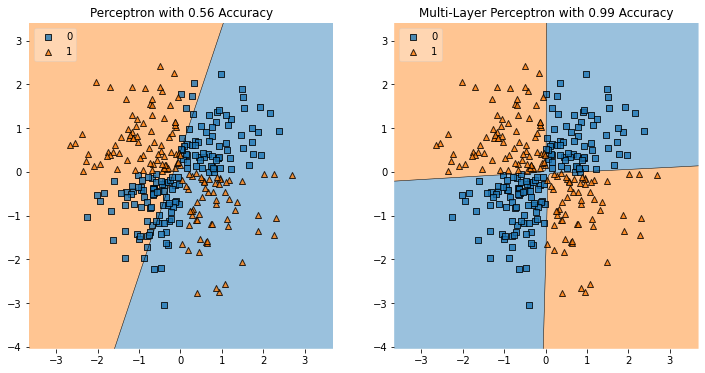

In [ ]:
# 이 셀의 코드는 변경하지 마세요

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나오실 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

In [ ]:
# 여기에 답변하시고, Cell을 Markdown으로 변경해서 입력하세요.

정확도가 낮게 나오는 이유는 선형으로 분류되는 단층 퍼셉트론으로는 해결할 수 없는 문제기 때문입니다.  
다층 퍼셉트론의 구조적 특징은 중간층과 각 구성단위의 입출력 특징을 비선형으로 추출하는것.

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [ ]:
# 결측치 확인
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# 데이터 타입 확인
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# 훈련-테스트 데이터셋 분리
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=1)
print("train : ",train.shape)
print("test : ",test.shape)

train :  (227, 14)
test :  (76, 14)


In [ ]:
# features 와 target 분리
target = 'target'
features = df.drop(columns=[target]).columns

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]

In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import keras
import tensorflow as tf
import IPython
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install -U keras-tuner
import kerastuner as kt

In [ ]:
# 기본 모델 (정규화)
model1 = Sequential()
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

m1 = model1.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled,y_test)) #, callbacks = [early_stopping])

Epoch 1/30
8/8 [==============================] - 2s 69ms/step - loss: 0.6668 - accuracy: 0.5771 - val_loss: 0.6006 - val_accuracy: 0.8289
Epoch 2/30
8/8 [==============================] - 0s 17ms/step - loss: 0.5636 - accuracy: 0.8282 - val_loss: 0.5388 - val_accuracy: 0.7895
Epoch 3/30
8/8 [==============================] - 0s 14ms/step - loss: 0.4913 - accuracy: 0.8194 - val_loss: 0.4840 - val_accuracy: 0.8026
Epoch 4/30
8/8 [==============================] - 0s 19ms/step - loss: 0.4349 - accuracy: 0.8282 - val_loss: 0.4360 - val_accuracy: 0.8158
Epoch 5/30
8/8 [==============================] - 0s 19ms/step - loss: 0.3895 - accuracy: 0.8326 - val_loss: 0.4066 - val_accuracy: 0.8158
Epoch 6/30
8/8 [==============================] - 0s 24ms/step - loss: 0.3582 - accuracy: 0.8546 - val_loss: 0.4021 - val_accuracy: 0.8158
Epoch 7/30
8/8 [==============================] - 0s 19ms/step - loss: 0.3369 - accuracy: 0.8458 - val_loss: 0.3897 - val_accuracy: 0.8026
Epoch 8/30
8/8 [===========

In [ ]:
# 테스트셋 사용해서 결과 보기 (1)
model1.evaluate(X_test_scaled,  y_test, verbose=2) 

3/3 - 0s - loss: 0.5742 - accuracy: 0.8026 - 48ms/epoch - 16ms/step


[0.5742236375808716, 0.8026315569877625]

In [ ]:
# 기본 모델 (정규화 X)
model2 = Sequential()
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

m2 = model2.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test), callbacks = [early_stopping])

Epoch 1/30
8/8 [==============================] - 2s 88ms/step - loss: 2.9471 - accuracy: 0.4581 - val_loss: 1.2920 - val_accuracy: 0.6053
Epoch 2/30
8/8 [==============================] - 0s 21ms/step - loss: 1.1079 - accuracy: 0.5991 - val_loss: 0.8661 - val_accuracy: 0.6711
Epoch 3/30
8/8 [==============================] - 0s 29ms/step - loss: 0.7879 - accuracy: 0.6608 - val_loss: 0.7957 - val_accuracy: 0.6447
Epoch 4/30
8/8 [==============================] - 0s 28ms/step - loss: 0.6640 - accuracy: 0.7093 - val_loss: 0.7031 - val_accuracy: 0.6579
Epoch 5/30
8/8 [==============================] - 0s 20ms/step - loss: 0.6295 - accuracy: 0.6740 - val_loss: 0.6708 - val_accuracy: 0.6711
Epoch 6/30
8/8 [==============================] - 0s 21ms/step - loss: 0.5804 - accuracy: 0.7093 - val_loss: 0.7767 - val_accuracy: 0.6974
Epoch 7/30
8/8 [==============================] - 0s 21ms/step - loss: 0.6879 - accuracy: 0.6344 - val_loss: 0.6438 - val_accuracy: 0.6974
Epoch 8/30
8/8 [===========

In [ ]:
# 테스트셋 사용해서 결과 보기 (2)
model2.evaluate(X_test,  y_test, verbose=2) 

3/3 - 0s - loss: 0.5374 - accuracy: 0.7237 - 48ms/epoch - 16ms/step


[0.5373780727386475, 0.7236841917037964]

정규화 한 모델이 성능이 훨씬 좋다.

In [ ]:
def model_builder(nodes=16, activation='relu'):

  model = Sequential()
  model.add(Dense(nodes, activation=activation))
  model.add(Dense(nodes, activation=activation))
  model.add(Dense(nodes, activation=activation))
  model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

  model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

  return model

# keras.wrapper를 활용하여 분류기를 만듭니다
model = KerasClassifier(build_fn=model_builder, verbose=0)

# GridSearch
batch_size = [32, 64, 128, 256]
nodes = [64, 128, 256, 512]
activation = ['relu', 'sigmoid']
param_grid = dict(batch_size=batch_size, nodes=nodes, activation=activation)


# GridSearch CV를 만들기
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  app.launch_new_instance()


Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
# 최적의 결과값을 낸 파라미터를 출력합니다
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8369590640068054 using {'activation': 'relu', 'batch_size': 32, 'nodes': 256}
Means: 0.6339766184488932, Stdev: 0.061970699490452655 with: {'activation': 'relu', 'batch_size': 32, 'nodes': 64}
Means: 0.7795906464258829, Stdev: 0.02389244502142393 with: {'activation': 'relu', 'batch_size': 32, 'nodes': 128}
Means: 0.8369590640068054, Stdev: 0.022685855462814136 with: {'activation': 'relu', 'batch_size': 32, 'nodes': 256}
Means: 0.8191812634468079, Stdev: 0.045714313392544545 with: {'activation': 'relu', 'batch_size': 32, 'nodes': 512}
Means: 0.62578946352005, Stdev: 0.053696259615156554 with: {'activation': 'relu', 'batch_size': 64, 'nodes': 64}
Means: 0.7754970788955688, Stdev: 0.027288204749766502 with: {'activation': 'relu', 'batch_size': 64, 'nodes': 128}
Means: 0.7885380188624064, Stdev: 0.010824541789364726 with: {'activation': 'relu', 'batch_size': 64, 'nodes': 256}
Means: 0.8368421196937561, Stdev: 0.02817961580562674 with: {'activation': 'relu', 'batch_size': 64, 'nodes

In [ ]:
# 최적 파라미터의 모델
model3 = Sequential()
model3.add(Dense(256, activation='relu', batch_size=32))
model3.add(Dense(256, activation='relu', batch_size=32))
model3.add(Dense(256, activation='relu', batch_size=32))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

m3 = model3.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled,y_test)) #, callbacks = [early_stopping])

Epoch 1/30
8/8 [==============================] - 3s 111ms/step - loss: 0.5907 - accuracy: 0.6872 - val_loss: 0.4609 - val_accuracy: 0.7895
Epoch 2/30
8/8 [==============================] - 0s 22ms/step - loss: 0.3800 - accuracy: 0.8370 - val_loss: 0.4125 - val_accuracy: 0.7763
Epoch 3/30
8/8 [==============================] - 0s 26ms/step - loss: 0.3276 - accuracy: 0.8590 - val_loss: 0.4240 - val_accuracy: 0.8158
Epoch 4/30
8/8 [==============================] - 0s 21ms/step - loss: 0.2873 - accuracy: 0.8767 - val_loss: 0.4361 - val_accuracy: 0.8421
Epoch 5/30
8/8 [==============================] - 0s 17ms/step - loss: 0.2559 - accuracy: 0.8899 - val_loss: 0.4455 - val_accuracy: 0.8289
Epoch 6/30
8/8 [==============================] - 0s 25ms/step - loss: 0.2467 - accuracy: 0.8943 - val_loss: 0.4568 - val_accuracy: 0.8289
Epoch 7/30
8/8 [==============================] - 0s 21ms/step - loss: 0.2170 - accuracy: 0.9163 - val_loss: 0.4706 - val_accuracy: 0.7895
Epoch 8/30
8/8 [==========

In [ ]:
# 테스트셋 사용해서 결과 보기 (3)
model3.evaluate(X_test_scaled,  y_test, verbose=2) 

3/3 - 0s - loss: 1.0329 - accuracy: 0.8158 - 84ms/epoch - 28ms/step


[1.0329207181930542, 0.8157894611358643]

과적합되었고 테스트셋에서의 정확도는 크게 개선되지 않았다.

In [ ]:
# 모델 만들기
from tensorflow import keras
def model_builder(hp):

  model = Sequential()

  # Dense layer에서 노드 수를 조정(32-512)
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)

  model.add(Dense(units = hp_units, activation='relu'))
  model.add(Dense(units = hp_units, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate), 
                loss=keras.losses.BinaryCrossentropy(from_logits = True), 
                metrics=['accuracy'])

  return model

In [ ]:
# 튜너를 인스턴스화하고 하이퍼 튜닝을 수행

tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 30, 
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [ ]:
tuner.search(X_train_scaled, y_train, epochs = 30, batch_size=50, validation_data = (X_test_scaled,y_test))

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
최적화된 Dense 노드 수 : {best_hps.get('units')} 
최적화된 Learning Rate : {best_hps.get('learning_rate')} 
""")

INFO:tensorflow:Oracle triggered exit

최적화된 Dense 노드 수 : 224 
최적화된 Learning Rate : 0.01 



In [ ]:
from tensorflow.keras import regularizers

tf.random.set_seed(1442)
initializer = tf.keras.initializers.HeNormal()

model = Sequential()

model.add(Dense(best_hps.get('units'), 
                activation='relu', kernel_initializer=initializer,          
                kernel_regularizer=regularizers.l2(0.01),    # L2 norm regularization
                activity_regularizer=regularizers.l1(0.01))) # L1 norm regularization))
model.add(Dense(best_hps.get('units'),
                activation='relu', kernel_initializer=initializer,            
                kernel_regularizer=regularizers.l2(0.01),    # L2 norm regularization
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

model.compile(optimizer=keras.optimizers.Adam(learning_rate = best_hps.get('learning_rate')), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

results = model.fit(X_train_scaled, y_train, epochs=2, batch_size=50, validation_data=(X_test_scaled,y_test))

Epoch 1/2
5/5 [==============================] - 2s 120ms/step - loss: 10.5833 - accuracy: 0.7665 - val_loss: 8.4314 - val_accuracy: 0.8289
Epoch 2/2
5/5 [==============================] - 0s 21ms/step - loss: 7.6215 - accuracy: 0.8590 - val_loss: 6.4066 - val_accuracy: 0.8158


In [ ]:
# 테스트셋 사용해서 결과 보기 (4)
model.evaluate(X_test_scaled,  y_test, verbose=2)

3/3 - 0s - loss: 6.4066 - accuracy: 0.8158 - 48ms/epoch - 16ms/step


[6.406580924987793, 0.8157894611358643]

별반 차이 없다. 음... 아래는 대체 어케했지?

In [ ]:
# 이 곳에 답안을 작성하시기 바랍니다

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
212   39    1   0       118   219  ...      0      1.2      1   0     3
46    44    1   2       140   235  ...      0      0.0      2   0     2
217   63    1   0       130   330  ...      1      1.8      2   3     3
93    54    0   1       132   288  ...      1      0.0      2   1     2
39    65    0   2       160   360  ...      0      0.8      2   0     2

[5 rows x 13 columns]
212    0
46     1
217    0
93     1
39     1
Name: target, dtype: int64


Epoch 1/200
8/8 [==============================] - 0s 18ms/step - loss: 0.4335 - accuracy: 0.7833 - val_loss: 0.2423 - val_accuracy: 0.9667
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1616 - accuracy: 0.9583 - val_loss: 0.1773 - val_accuracy: 0.9500
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1419 - accuracy: 0.9417 - val_loss: 0.1302 - val_accuracy: 0.9667
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.9292 - val_loss: 0.1447 - val_accuracy: 0.9167
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.9208 - val_loss: 0.1426 - val_accuracy: 0.9833
Epoch 6/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1953 - accuracy: 0.9375 - val_loss: 0.1006 - val_accuracy: 1.0000
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1099 - accuracy: 0.9583 - val_loss: 0.1043 - val_accuracy: 0.9667
Epoch 8/200
8/8 [=========

배치 정규화를 적용해보자

In [ ]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant

In [ ]:
# 최적 파라미터의 모델
model4 = Sequential()
model4.add(Dense(64, activation='relu',batch_size=128))
#model4.add(BatchNormalization())
model4.add(Dense(64, activation='relu',batch_size=128))
#model4.add(BatchNormalization())

model4.add(Dense(1, activation='sigmoid'))
"""
model4.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
))
"""
model4.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

m4 = model4.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled,y_test)) #, callbacks = [early_stopping])

Epoch 1/30
8/8 [==============================] - 2s 55ms/step - loss: 0.6574 - accuracy: 0.6035 - val_loss: 0.5658 - val_accuracy: 0.8289
Epoch 2/30
8/8 [==============================] - 0s 15ms/step - loss: 0.5437 - accuracy: 0.8106 - val_loss: 0.5101 - val_accuracy: 0.8289
Epoch 3/30
8/8 [==============================] - 0s 14ms/step - loss: 0.4734 - accuracy: 0.8282 - val_loss: 0.4694 - val_accuracy: 0.8158
Epoch 4/30
8/8 [==============================] - 0s 14ms/step - loss: 0.4200 - accuracy: 0.8590 - val_loss: 0.4370 - val_accuracy: 0.7895
Epoch 5/30
8/8 [==============================] - 0s 20ms/step - loss: 0.3826 - accuracy: 0.8634 - val_loss: 0.4156 - val_accuracy: 0.7895
Epoch 6/30
8/8 [==============================] - 0s 19ms/step - loss: 0.3550 - accuracy: 0.8722 - val_loss: 0.4120 - val_accuracy: 0.7763
Epoch 7/30
8/8 [==============================] - 0s 18ms/step - loss: 0.3345 - accuracy: 0.8811 - val_loss: 0.4062 - val_accuracy: 0.7763
Epoch 8/30
8/8 [===========

In [ ]:
# 테스트셋 사용해서 결과 보기 (4)
model4.evaluate(X_test_scaled,  y_test, verbose=2)

3/3 - 0s - loss: 0.4618 - accuracy: 0.8158 - 26ms/epoch - 9ms/step


[0.46178677678108215, 0.8157894611358643]

0.8158 위로 왜 못올리겠지 ㅠㅠㅠ